In [1]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

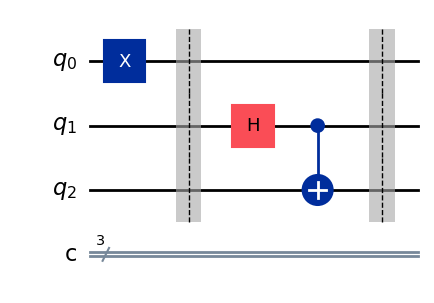

In [2]:
# Create a quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)
qc.x(0)
qc.barrier()
qc.h(1)          # Hadamard gate
qc.cx(1, 2)      # CNOT gate
qc.barrier()
qc.draw('mpl')

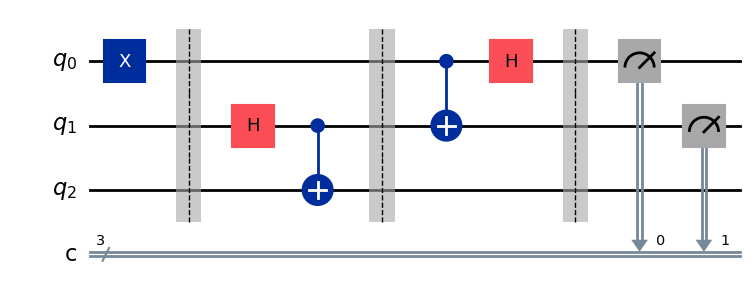

In [3]:
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure([0,1],[0,1])
qc.draw("mpl")

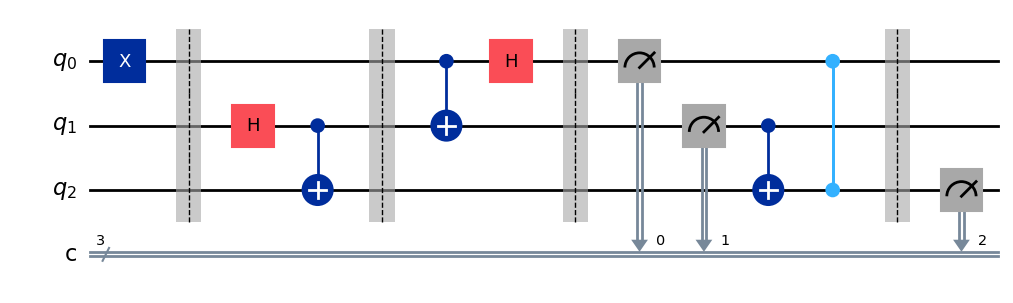

In [4]:
qc.cx(1,2)
qc.cz(0,2)
qc.barrier()
qc.measure([2],[2])
qc.draw("mpl")

In [5]:
backend=AerSimulator(method="automatic")
circuit=transpile(qc,backend)
result=backend.run(circuit,shots=1024).result()

Measurement results: {'101': 268, '100': 246, '111': 251, '110': 259}


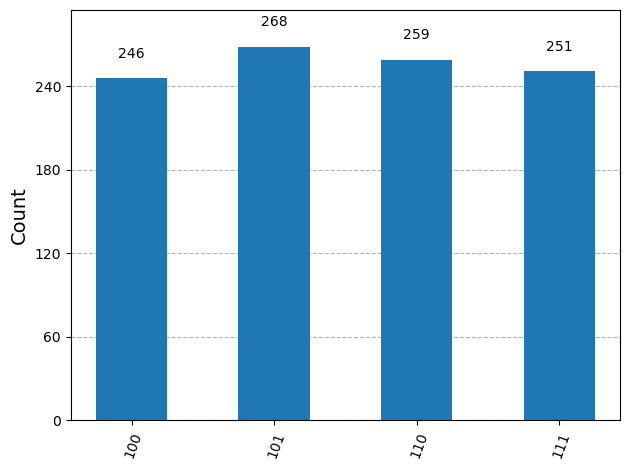

In [14]:
count=result.get_counts()
print("Measurement results:", count)
plot_histogram(count)
plt.show()